In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import os
import folium
import pandas as pd
import numpy as np
import networkx as nx

import seaborn as sns 
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
%matplotlib inline
from IPython.display import set_matplotlib_formats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 사람/투석

In [ ]:
df_node1 = pd.read_csv('/content/drive/Shareddrives/2022데이터마이닝응용/4 프로젝트/코드/종연_코드/투석_최종/투석_사람_nodes.csv', encoding = 'cp949')
df_link1 = pd.read_csv('/content/drive/Shareddrives/2022데이터마이닝응용/4 프로젝트/코드/종연_코드/투석_최종/투석_사람_links.csv', encoding = 'cp949')

In [ ]:
links1 = df_link1[['Source', 'Target', 'Weight']]
links1.tail()

,Source,Target,Weight
221,40.0,66.0,4.517606
222,40.0,94.0,7.889065
223,48.0,77.0,4.020387
224,48.0,79.0,3.713404
225,49.0,68.0,7.577889


In [ ]:
nodes1 = df_node1[['id', 'NAME', 'latitude', 'longitude','TYPE']]
nodes1.head()

,id,NAME,latitude,longitude,TYPE
0,0,환자,36.698989,127.481918,사람
1,1,환자,36.663737,127.417545,사람
2,2,환자,36.589344,127.487583,사람
3,3,환자,36.616492,127.519512,사람
4,4,환자,36.613333,127.540307,사람


### 네트워크 구성

In [ ]:
G1 = nx.Graph()
R = 6371e3

In [ ]:
for idx, row in nodes1.iterrows():
  G1.add_node(row['id'], Label=row['NAME'], latitude=row['latitude'], longitude=row['longitude'])

In [ ]:
for idx, row in links1.iterrows():
  G1.add_edge(row['Source'], row['Target'], weight = row['Weight'])

In [ ]:
print(nx.info(G1))

Graph with 96 nodes and 226 edges


### community detection

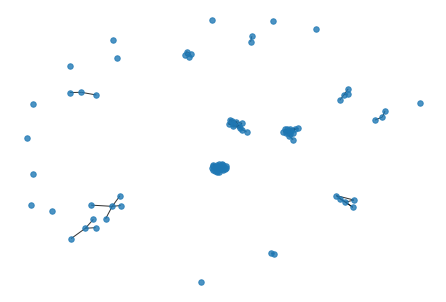

In [ ]:
# visualize graph
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_size = 30, alpha = 0.8)
plt.show()

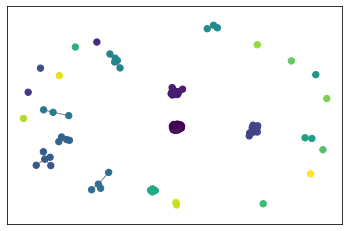

In [ ]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

partition = cl.best_partition(G1)

pos = nx.spring_layout(G1)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G1, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G1, pos, alpha=0.5)
plt.show()

In [ ]:
from community import community_louvain
comms = community_louvain.best_partition(G1)

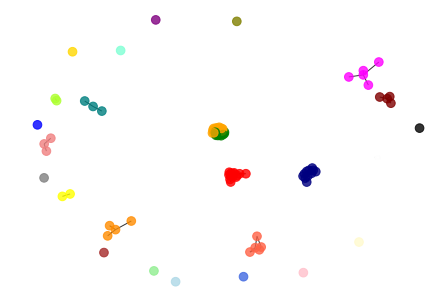

In [ ]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow',
    6 : 'white',
    7 : 'pink',
    8 : 'purple',
    9 : 'red',
    10 : 'blue',
    11 : 'gray',
    12 : 'brown',
    13 : 'olive',
    14 : 'royalblue',
    15 : 'navy',
    16 : 'gold',
    17 : 'tomato',
    18 : 'aquamarine',
    19 : 'lightblue',
    20 : 'lightgreen',
    21 : 'darkorange',
    22 : 'lightcoral',
    23 : 'greenyellow',
    24 : 'lemonchiffon',
    25 : 'magenta'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

### clustering

#### 계층적 군집분석

In [ ]:
nodes1.head()

,id,NAME,latitude,longitude,TYPE
0,0,환자,36.698989,127.481918,사람
1,1,환자,36.663737,127.417545,사람
2,2,환자,36.589344,127.487583,사람
3,3,환자,36.616492,127.519512,사람
4,4,환자,36.613333,127.540307,사람


In [ ]:
nodes_c = nodes1.copy()
nodes_c.set_index('id', inplace = True)
nodes_c.head()

,NAME,latitude,longitude,TYPE
id,,,,
0,환자,36.698989,127.481918,사람
1,환자,36.663737,127.417545,사람
2,환자,36.589344,127.487583,사람
3,환자,36.616492,127.519512,사람
4,환자,36.613333,127.540307,사람


In [ ]:
nodes_c = nodes_c[['latitude', 'longitude']]
nodes_c.head()

,latitude,longitude
id,,
0,36.698989,127.481918
1,36.663737,127.417545
2,36.589344,127.487583
3,36.616492,127.519512
4,36.613333,127.540307


In [ ]:
data_prime = nodes_c.copy()

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='single', metric='euclidean')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


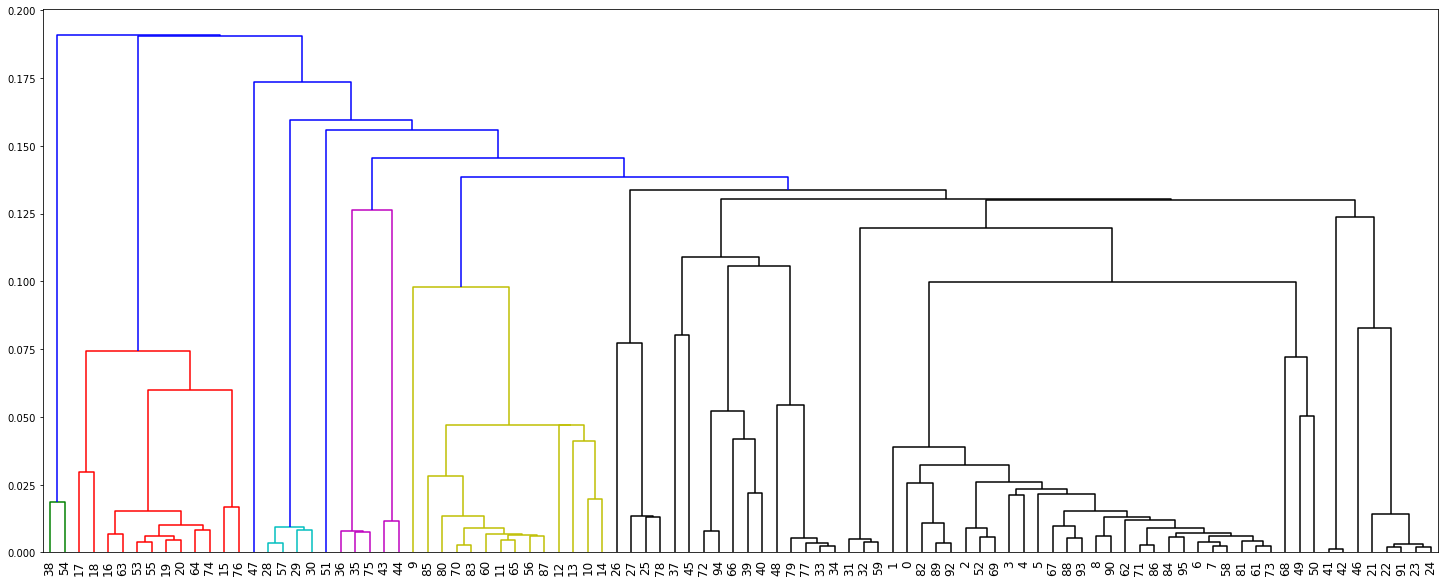

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=0.125, criterion='distance')
cut_tree

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  6,  6,  6,  6,  6,  6,  2,  2,
        2,  2,  2,  2, 10, 10, 10, 10,  7,  7,  7,  3,  3,  3,  9,  9,  8,
        8,  4,  4,  8,  1,  8,  8, 10, 10,  5,  5,  8, 10, 12,  8,  9,  9,
       11,  9,  2,  1,  2,  6,  3,  9,  9,  6,  9,  9,  2,  2,  6,  8,  9,
        9,  9,  6,  9,  8,  9,  2,  4,  2,  8,  7,  8,  6,  9,  9,  6,  9,
        6,  9,  6,  9,  9,  9, 10,  9,  9,  8,  9], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

9     33
6     14
2     12
8     12
10     8
7      4
3      4
4      3
1      2
5      2
12     1
11     1
dtype: int64

In [ ]:
single_hierarchical = pd.DataFrame(fcluster(clusters, t=0.125, criterion='distance'), index = data_prime.index)

In [ ]:
df = data_prime.copy()
df["ClusterHierarchical"] = single_hierarchical.values
df.head()

,latitude,longitude,ClusterHierarchical
id,,,
0,36.698989,127.481918,9
1,36.663737,127.417545,9
2,36.589344,127.487583,9
3,36.616492,127.519512,9
4,36.613333,127.540307,9


##### evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:12], '\nSilhouette Score shape:', score_samples.shape, '\n')
average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))
# 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것

Silhouette Score: [0.6164405  0.69197905 0.60796686 0.58150276 0.45974563 0.70708267
 0.76672702 0.76739633 0.72741808 0.5634249  0.4643088  0.82038821] 
Silhouette Score shape: (96,) 

Silhouette Average Score:0.634


In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,latitude,longitude,hc_cluster,silhouette_coeff
id,,,,
0,36.698989,127.481918,9,0.616441
1,36.663737,127.417545,9,0.691979
2,36.589344,127.487583,9,0.607967
3,36.616492,127.519512,9,0.581503
4,36.613333,127.540307,9,0.459746
...,...,...,...,...
91,36.483223,127.718118,10,0.628838
92,36.670466,127.484351,9,0.719374
93,36.624479,127.495337,9,0.695721


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1     0.918124
2     0.724568
3     0.942429
4     0.925084
5     0.911552
6     0.704775
7     0.735904
8     0.389025
9     0.613913
10    0.530636
11    0.000000
12    0.000000
Name: silhouette_coeff, dtype: float64
표준편차: 0.3347296723128154


##### EDA

In [ ]:
# 군집별 통계(평균)
cluster_g = data_prime.groupby('hc_cluster')
cluster_g.mean()

,latitude,longitude,silhouette_coeff
hc_cluster,,,
1,36.984226,128.359952,0.918124
2,37.131795,128.192438,0.724568
3,36.180543,127.778869,0.942429
4,36.811514,127.789835,0.925084
5,36.681068,127.798908,0.911552
6,36.977053,127.917204,0.704775
7,36.284918,127.586543,0.735904
8,36.919063,127.538263,0.389025
9,36.649107,127.462442,0.613913


#### K-Means

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

from matplotlib import pyplot
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc("font", family = "Malgun Gothic")

In [ ]:
nodes_c.head()

,latitude,longitude
id,,
0,36.698989,127.481918
1,36.663737,127.417545
2,36.589344,127.487583
3,36.616492,127.519512
4,36.613333,127.540307


In [ ]:
from sklearn.cluster import KMeans

cluster_range = [i+1 for i in range(15)]
clus_error = []

for i in cluster_range:
    clus = KMeans(i)
    clus.fit(nodes_c)
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})
ds_error

,NumberofCluster,Error
0,1,13.515098
1,2,4.978571
2,3,2.930884
3,4,1.715520
4,5,1.178979
5,6,0.892187
6,7,0.710481
7,8,0.591906
8,9,0.503244
9,10,0.398712


Text(0, 0.5, 'Sum of squared distance')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


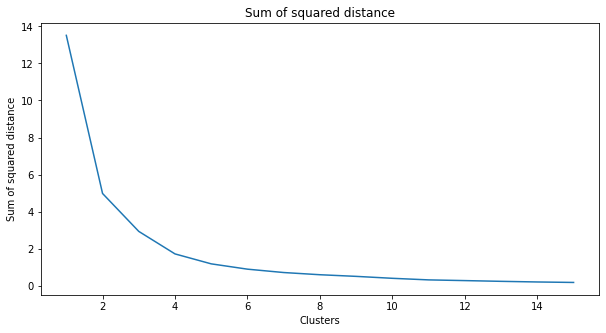

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [ ]:
df_kmeans = nodes_c.copy()
np.random.seed(42)

model = KMeans(n_clusters = 12)
kmeans = KMeans(n_clusters = 12).fit(nodes_c)
cluster_kmeans = [i+1 for i in kmeans.labels_]
df_kmeans["ClusterKmeans"] = cluster_kmeans
df_kmeans

,latitude,longitude,ClusterKmeans
id,,,
0,36.698989,127.481918,8
1,36.663737,127.417545,8
2,36.589344,127.487583,8
3,36.616492,127.519512,8
4,36.613333,127.540307,8
...,...,...,...
91,36.483223,127.718118,9
92,36.670466,127.484351,8
93,36.624479,127.495337,8


In [ ]:
# cluster_kmeans

In [ ]:
kmeans.cluster_centers_

array([[ 36.21357958, 127.78130898],
       [ 36.77923313, 127.57458147],
       [ 36.9770533 , 127.91720408],
       [ 37.13179456, 128.19243772],
       [ 36.33782437, 127.58446587],
       [ 36.66698923, 127.2651698 ],
       [ 36.76002962, 127.82727903],
       [ 36.63266101, 127.47190174],
       [ 36.49423178, 127.70330438],
       [ 36.95654836, 127.60831956],
       [ 36.98422615, 128.35995205],
       [ 36.86658396, 127.44018282]])

In [ ]:
kmeans.labels_

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  8,  8,  8,  8,  4,  4,  4,  0,  0,  0,  1,  1, 11,
       11,  6,  6,  9, 10,  9,  9,  4,  4,  6,  6,  9,  8,  6, 11,  5,  5,
        0,  7,  3, 10,  3,  2,  0,  7,  1,  2,  7,  7,  3,  3,  2,  9,  7,
        5,  7,  2,  7,  9,  7,  3,  6,  3, 11,  4, 11,  2,  7,  7,  2,  7,
        2,  7,  2,  7,  7,  7,  8,  7,  7,  9,  7], dtype=int32)

In [ ]:
df_kmeans["cluster"] = kmeans.labels_
df_kmeans.head()

,latitude,longitude,ClusterKmeans,cluster
id,,,,
0,36.698989,127.481918,8,7
1,36.663737,127.417545,8,7
2,36.589344,127.487583,8,7
3,36.616492,127.519512,8,7
4,36.613333,127.540307,8,7


##### EDA

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

#remember to scale your data if the ranges are too broad

# scaled_features= scaler.fit_transform(df) == df_x
# kmeans_model= KMeans(n_clusters=3, max_iter=500, random_state=42)

kmeans_model = KMeans(n_clusters = 10, random_state = 42)

y_km= kmeans_model.fit_predict(nodes_c)

pca_model= PCA(n_components=2, random_state=42)
transformed= pca_model.fit_transform(nodes_c)
centers= pca_model.transform(kmeans_model.cluster_centers_)

fig = px.scatter(x = transformed[:, 0], y = transformed[:, 1], color = y_km, text=df_kmeans.index, title = "K-Means")
fig.add_scatter(
    x=centers[:, 0],
    y=centers[:, 1],
    marker=dict(size=10, color="LightSeaGreen"), name="Centers",
)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


##### evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
nodes_c2 = nodes_c.copy()
model.fit(nodes_c2)
pred = model.predict(nodes_c2)
nodes_c2['k_means_cluster'] = pred
nodes_c2['k_silhouette_coeff'] = silhouette_samples(nodes_c2, nodes_c2['k_means_cluster'])

k_average_score = silhouette_score(nodes_c2, nodes_c2['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.943


In [ ]:
# 군집별 평균 silhouette_score 값
nodes_c2.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0     0.949361
1     0.960197
2     0.991617
3     0.952942
4     0.908494
5     0.976124
6     0.880550
7     0.906109
8     0.956128
9     0.927377
10    0.985582
11    0.996019
Name: k_silhouette_coeff, dtype: float64

##### 시각화(Folium)

In [ ]:
df_kmeans.head()

,latitude,longitude,ClusterKmeans,cluster
id,,,,
0,36.698989,127.481918,8,7
1,36.663737,127.417545,8,7
2,36.589344,127.487583,8,7
3,36.616492,127.519512,8,7
4,36.613333,127.540307,8,7


In [ ]:
nodes1.head()

,id,NAME,latitude,longitude,TYPE
0,0,환자,36.698989,127.481918,사람
1,1,환자,36.663737,127.417545,사람
2,2,환자,36.589344,127.487583,사람
3,3,환자,36.616492,127.519512,사람
4,4,환자,36.613333,127.540307,사람


In [ ]:
df_kmeans_final = pd.merge(nodes1, df_kmeans, how = 'left', left_on = 'id', right_on = df_kmeans.index)
df_kmeans_final.head()

,id,NAME,latitude_x,longitude_x,TYPE,latitude_y,longitude_y,ClusterKmeans,cluster
0,0,환자,36.698989,127.481918,사람,36.698989,127.481918,8,7
1,1,환자,36.663737,127.417545,사람,36.663737,127.417545,8,7
2,2,환자,36.589344,127.487583,사람,36.589344,127.487583,8,7
3,3,환자,36.616492,127.519512,사람,36.616492,127.519512,8,7
4,4,환자,36.613333,127.540307,사람,36.613333,127.540307,8,7


In [ ]:
df_kmeans_final = df_kmeans_final[['id', 'NAME', 'TYPE', 'latitude_x', 'longitude_x', 'cluster']]
df_kmeans_final.columns = ['id', 'NAME', 'TYPE', 'latitude', 'longitude', 'cluster']
df_kmeans_final.head()

,id,NAME,TYPE,latitude,longitude,cluster
0,0,환자,사람,36.698989,127.481918,7
1,1,환자,사람,36.663737,127.417545,7
2,2,환자,사람,36.589344,127.487583,7
3,3,환자,사람,36.616492,127.519512,7
4,4,환자,사람,36.613333,127.540307,7


In [ ]:
df_kmeans_final.tail()

,id,NAME,TYPE,latitude,longitude,cluster
91,91,의료법인 정민의료재단 보은한양병원,병원,36.483223,127.718118,8
92,92,김민옥내과의원,병원,36.670466,127.484351,7
93,93,의료법인 정산의료재단 효성병원,병원,36.624479,127.495337,7
94,94,신용봉내과의원,병원,36.989603,127.598395,9
95,95,(사)대한신장복지회 대신의원,병원,36.635226,127.475475,7


In [ ]:
kmeans.cluster_centers_

array([[ 36.21357958, 127.78130898],
       [ 36.77923313, 127.57458147],
       [ 36.9770533 , 127.91720408],
       [ 37.13179456, 128.19243772],
       [ 36.33782437, 127.58446587],
       [ 36.66698923, 127.2651698 ],
       [ 36.76002962, 127.82727903],
       [ 36.63266101, 127.47190174],
       [ 36.49423178, 127.70330438],
       [ 36.95654836, 127.60831956],
       [ 36.98422615, 128.35995205],
       [ 36.86658396, 127.44018282]])

In [ ]:
idx = 96
cluster_num = 0
for kc in kmeans.cluster_centers_:
  df_kmeans_final.loc[idx] = [idx, 'center', 'center', kc[0], kc[1], cluster_num]
  idx += 1
  cluster_num += 1

df_kmeans_final.tail()

,id,NAME,TYPE,latitude,longitude,cluster
103,103,center,center,36.632661,127.471902,7
104,104,center,center,36.494232,127.703304,8
105,105,center,center,36.956548,127.608320,9
106,106,center,center,36.984226,128.359952,10
107,107,center,center,36.866584,127.440183,11


In [ ]:
std_point = tuple(df_kmeans_final.head(1)[['latitude', 'longitude']].iloc[0])
std_point

(36.6989887, 127.481918)

In [ ]:
# ‘darkgreen’, ‘cadetblue’, ‘darkpurple’, ‘white’, 
# ‘gray’, ‘black’, ‘lightgray’

def fillColor(cluster):
  if cluster == 0:
    return 'red'
  elif cluster == 1:
    return 'blue'
  elif cluster == 2:
    return 'green'
  elif cluster == 3:
    return 'purple'
  elif cluster == 4:
    return 'orange'
  elif cluster == 5:
    return 'pink'
  elif cluster == 6:
    return 'darkred'
  elif cluster == 7:
    return 'lightgreen'
  elif cluster == 8:
    return 'lightblue'
  elif cluster == 9:
    return 'black'
  elif cluster == 10:
    return 'beige'
  elif cluster == 11:
    return 'darkgreen'
  else:
    return 'darkblue'

In [ ]:
from folium.plugins import BeautifyIcon

map_osm = folium.Map(location=std_point, zoom_start=8)

for ix, row in df_kmeans_final.iterrows():
  location = (row['latitude'], row['longitude'])

  name = row['NAME'] 
  cluster = row['cluster']

  popup = f"{name}-{cluster}"

  if row['NAME'] == 'center':
    inner_icon_style = 'color:' + fillColor(row['cluster']) + ';font-size:30px;'
    icon_star = BeautifyIcon(
        icon='star',
        inner_icon_style=inner_icon_style,
        background_color='transparent',
        border_color='transparent',
      )

    folium.Marker(location = location, tooltip='star', icon=icon_star).add_to(map_osm)
  else:
    folium.Marker(
        location = location, 
        popup = popup,
        icon=folium.Icon(color = fillColor(row['cluster']))).add_to(map_osm)

map_osm

# 사람/보건소/병원

In [ ]:
df_node2 = pd.read_csv('/content/drive/Shareddrives/2022데이터마이닝응용/4 프로젝트/코드/종연_코드/투석_최종/투석_사람_보건소_nodes.csv', encoding = 'cp949')
df_link2 = pd.read_csv('/content/drive/Shareddrives/2022데이터마이닝응용/4 프로젝트/코드/종연_코드/투석_최종/투석_사람_보건소_links.csv', encoding = 'cp949')

In [ ]:
links2 = df_link2[['Source', 'Target', 'Weight']]
links2.tail()

,Source,Target,Weight
1224,356.0,89.0,4.769601
1225,356.0,90.0,6.077417
1226,356.0,92.0,4.758572
1227,356.0,93.0,7.723483
1228,356.0,95.0,5.806746


In [ ]:
nodes2 = df_node2[['id', 'NAME', 'latitude', 'longitude','TYPE']]
nodes2.head()
nodes2['TYPE'].value_counts()

보건소    268
사람      52
병원      44
Name: TYPE, dtype: int64

### 네트워크 구성

In [ ]:
G2 = nx.Graph()
R = 6371e3

In [ ]:
for idx, row in nodes2.iterrows():
  G2.add_node(row['id'], Label=row['NAME'], latitude=row['latitude'], longitude=row['longitude'])

In [ ]:
for idx, row in links2.iterrows():
  G2.add_edge(row['Source'], row['Target'], weight = row['Weight'])

In [ ]:
print(G2)

Graph with 364 nodes and 1229 edges


### community detection

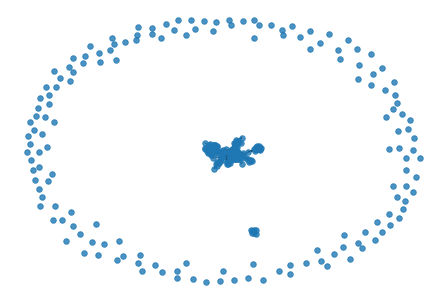

In [ ]:
# visualize graph
pos2 = nx.spring_layout(G2)
nx.draw(G2, pos2, node_size = 30, alpha = 0.8)
plt.show()

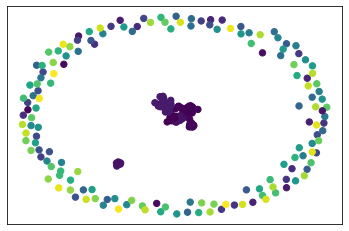

In [ ]:
partition2 = cl.best_partition(G2)

pos2 = nx.spring_layout(G2)

cmap2 = cm.get_cmap('viridis', max(partition2.values()) + 1)
nx.draw_networkx_nodes(G2, pos2, partition2.keys(), node_size=40,
                       cmap=cmap2, node_color=list(partition2.values()))
nx.draw_networkx_edges(G2, pos2, alpha=0.5)
plt.show()

In [ ]:
from community import community_louvain
comms2 = community_louvain.best_partition(G2)

In [ ]:
# unique_coms2 = np.unique(list(comms2.values()))
# cmap2 = {
#     0 : 'maroon',
#     1 : 'teal',
#     2 : 'black', 
#     3 : 'orange',
#     4 : 'green',
#     5 : 'yellow',
#     6 : 'white',
#     7 : 'pink',
#     8 : 'purple',
#     9 : 'red',
#     10 : 'blue',
#     11 : 'gray',
#     12 : 'brown',
#     13 : 'olive',
#     14 : 'royalblue',
#     15 : 'navy',
#     16 : 'gold',
#     17 : 'tomato',
#     18 : 'aquamarine',
#     19 : 'lightblue',
#     20 : 'lightgreen',
#     21 : 'darkorange',
#     22 : 'lightcoral',
#     23 : 'greenyellow',
#     24 : 'lemonchiffon',
#     25 : 'magenta'
# }

node_cmap2 = [v for _,v in comms2.items()]
len(node_cmap2)
# pos2 = nx.spring_layout(G2)
# nx.draw(G2, pos2, node_size = 75, alpha = 0.8, node_color=node_cmap2)
# plt.show()

364

### Folium

In [ ]:
std_point = tuple(nodes1.head(1)[['latitude', 'longitude']].iloc[0])
std_point

(36.6989887, 127.481918)

In [ ]:
nodes2['TYPE'].unique()

array(['사람', '병원', '보건소'], dtype=object)

#### 노드표시

In [ ]:
map_osm2 = folium.Map(location=std_point, zoom_start=8)

for ix, row in nodes2.iterrows():
  location = (row['latitude'], row['longitude'])
  popup = row['NAME'] 

  if row['TYPE'] == '사람' :
    color = 'red'
  elif row['TYPE'] == '병원':
    color = 'blue'
  else : 
    color = 'orange'

  folium.Circle(
      location = location,
      popup = popup,
      radius = 10*100,
      color = 'white',
      weight = 1,
      fill_opacity = 0.6,
      opacity = 1,
      fill_color = color ,
      fill = True 
  ).add_to(map_osm2)

map_osm2

#### 클러스터링 노드 추가

In [ ]:
from folium.plugins import BeautifyIcon

for ix, row in df_kmeans_final.iterrows():
  location = (row['latitude'], row['longitude'])

  if row['NAME'] == 'center':
    inner_icon_style = 'color:' + fillColor(row['cluster']) + ';font-size:30px;'
    icon_star = BeautifyIcon(
        icon='star',
        inner_icon_style=inner_icon_style,
        background_color='transparent',
        border_color='transparent',
      )

    folium.Marker(location = location, tooltip='star', icon=icon_star).add_to(map_osm2)

map_osm2